## Assignment 4: Exploring Yelp Reviews

**NOTE: THIS ASSIGNMENT IS OPTIONAL**

You must complete **one** out of homeworks #4, #5, and #6.

**Due date: Monday, 11/1 by the end of day**

In this assignment, we'll explore restaurant review data available through the [Yelp Dataset Challenge](https://www.yelp.com/dataset/challenge). The dataset includes Yelp data for user reviews and business information for 10 metropolitan areas. The `data` directory in this repository includes data files for reviews and restaurants in 3 of these cities: Cleveland, Pittsburgh, and Charlotte. These cities were chosen since the data is not too large — the data for the other cities can be downloaded from the Yelp download page. For this assignment, you are welcome to analyze data any of the three cities. 

This assignment is broken into two parts:

#### Part 1: testing how well sentiment analysis works.

Because Yelp reviews include the number of stars given by the user, the Yelp data set provides a unique opportunity to test how well our sentiment analysis works by comparing the number of stars to the polarity of reviews.

#### Part 2: analyzing correlations between restaurant reviews and census data

We'll explore geographic trends in the restaurant reviews, comparing our sentiment analysis results with user stars geographically. We'll also overlay review stars on maps of household income (using census data).
    
#### Background readings
- [Does sentiment analysis work?](http://varianceexplained.org/r/yelp-sentiment/)
- [The Geography of Taste: Using Yelp to Study Urban Culture](https://www.mdpi.com/2220-9964/7/9/376/pdf/1)

## 1. Does Sentiment Analysis Work?

In this part, we'll load the data, perform a sentiment analysis, and explore the results.

### 1.1 Load review data

You can choose data from Cleveland, Charlotte, or Pittsburgh. The data is stored as a JSON file and you can use `pandas.read_json` to load it. 

**Notes**

The JSON data is in a "records" format. To load it, you'll need to pass the following keywords: 

- `orient='records'`
- `lines=True`

In [1]:
import pandas as pd
import textblob
import string #common punctuation
import nltk #common stop words (no, hasn, why)
nltk.download('stopwords');


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#going with Charlotte

reviews= pd.read_json(r'C:\Users\brine\Documents\GitHub\MUSA_550\assignment-4-bri-ne\data\reviews_charlotte.json.gz', orient='records',lines=True )


In [5]:
reviews.head()

,business_id,review_id,stars,text
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...
2,ZCsvwa_dsqNB8d8tYHPdjw,ASZha3MiQJghtt3n5OGIsA,4,This random hole in the wall is located in the...
3,CGUK3cd2gxp2q3KPY19Oog,LrO2MkIWIjAoOeS5WImnrQ,5,Yum!! Had the kale grits and would definitely ...
4,xHZmM-kGXqOfmQNTm0T05g,m14cjbICuRRASAitrh_YXA,3,Overall the food is really good. We had brusch...


### 1.2 Format the review text

The first step is to split the review text into its individual words and make all of the words lower-cased.

Add a new column, called 'formatted_text', which each entry is a list of the lower-cased words in a review.

In [6]:
reviews["formatted_text"]= reviews["text"].str.lower()
#.str.split()


In [7]:
reviews.head()

,business_id,review_id,stars,text,formatted_text
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...,such a unique place & a great find. our waitre...
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...,easily entering my top 3 restaurants in charlo...
2,ZCsvwa_dsqNB8d8tYHPdjw,ASZha3MiQJghtt3n5OGIsA,4,This random hole in the wall is located in the...,this random hole in the wall is located in the...
3,CGUK3cd2gxp2q3KPY19Oog,LrO2MkIWIjAoOeS5WImnrQ,5,Yum!! Had the kale grits and would definitely ...,yum!! had the kale grits and would definitely ...
4,xHZmM-kGXqOfmQNTm0T05g,m14cjbICuRRASAitrh_YXA,3,Overall the food is really good. We had brusch...,overall the food is really good. we had brusch...


### 1.3 Review stop words

Use the `nltk` library to remove any stop words from the list of words in each review. 

Overwrite the 'formatted_text' column to contain a list of lower-cased words in each review, with no stop words. 

In [8]:
stop_words = list(set(nltk.corpus.stopwords.words('english')))

In [9]:
stop = stop_words

In [10]:
#getting rid of stop words
reviews["formatted_text"] = reviews["formatted_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [11]:
reviews.head(n=2)

,business_id,review_id,stars,text,formatted_text
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...,"unique place & great find. waitress funny, kno..."
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...,easily entering top 3 restaurants charlotte on...


In [12]:
import string

In [13]:
#using this fn that Nick provided, b/c strings like 'wow!' wouldn't drop punct
def remove_punctuation(sentence):
    """
    Remove punctuation from the input sentence.
    """
    translator = str.maketrans('', '', string.punctuation)
    return sentence.translate(translator)

In [14]:
#removing punctuation
reviews["formatted_text"] = [remove_punctuation(review)for review in reviews["formatted_text"]]

In [15]:
reviews.head(n=2)

,business_id,review_id,stars,text,formatted_text
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...,unique place great find waitress funny knowle...
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...,easily entering top 3 restaurants charlotte on...


### 1.4 Calculate polarity and subjectivity

Using the formatted text column, create a list of `textblob.TextBlob()` objects and then extract the `subjectivity` and `polarity`.

Add two new columns to the review DataFrame: `polarity` and `subjectivity`.

**Note: the polarity/subjectivity calculation can take several minutes to run**

In [16]:
blobs = [textblob.TextBlob(review)for review in reviews["formatted_text"]]

In [17]:
#checking it out
blobs[0].sentiment

Sentiment(polarity=0.40416666666666673, subjectivity=0.8416666666666667)

In [18]:
reviews["polarity"] = [blob.sentiment.polarity for blob in blobs]
reviews["subjectivity"] = [blob.sentiment.subjectivity for blob in blobs]

In [18]:
reviews.head(n=3)

,business_id,review_id,stars,text,formatted_text,polarity,subjectivity
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...,unique place great find waitress funny knowle...,0.404167,0.841667
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...,easily entering top 3 restaurants charlotte on...,0.508333,0.683333
2,ZCsvwa_dsqNB8d8tYHPdjw,ASZha3MiQJghtt3n5OGIsA,4,This random hole in the wall is located in the...,random hole wall located park rd shopping cent...,0.288910,0.546241


### 1.5 Comparing the sentiment analysis to number of stars 

Use `seaborn` to make two box plots, one showing the polarity vs number of user stars and one showing the subjectivity vs the number of user stars.

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Star Rating vs Subjectivity of Review')

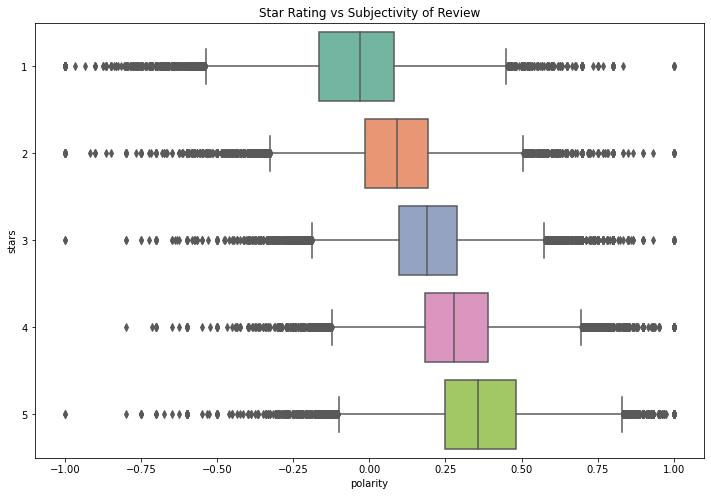

In [20]:
#Polarity Boxplot
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(y='stars', x='polarity', data=reviews, ax=ax, orient="h", palette="Set2").set_title("Star Rating vs Subjectivity of Review")


Text(0.5, 1.0, 'Star Rating vs Subjectivity of Review')

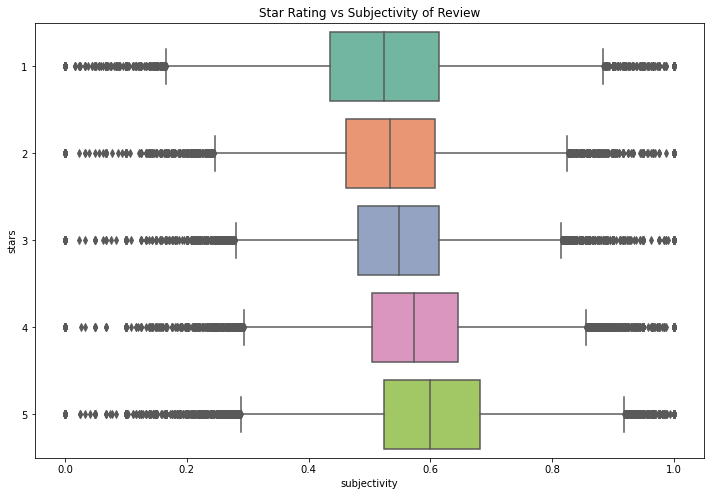

In [21]:
#Subjectivity Boxplot
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(y='stars', x='subjectivity', data=reviews, ax=ax, orient="h", palette="Set2").set_title("Star Rating vs Subjectivity of Review")


**Question:** What do your charts indicate for the effectiveness of our sentiment analysis?

## Answer 
It would make sense for polarity to increase with low and high star reviews. Our polarity plot shows this modestly for the 1 star reviews, and there is a increase in polarity as star rating increase. That make sense. Similarly, most of the reviews are shown to have subjectivity levvels greater than one. The nature of a review is subjective, so this also makes sense. however, there are a few reviews that show to have little to no subjectivity and there is variance between the number of stars a review has and its level of subjectivity. It's my assumption that all the reviews, no matter the star rating should show a similar level of subjectivty. Although, without any other reference it does seem like the reviews in the subjectivity box plot have somewhat similar spreads. As a result, it seems that our sentiment analysis is decently effective - though that's my subjective observation.   

### 1.6 The importance of individual words

In this part, we'll explore the importance and frequency of individual words in Yelp reviews.

We will identify the most common reviews and then plot the average polarity vs the user stars for the reviews where those words occur. 

#### 1.6.1 Select a random sample of the review data

Select 1,000 random rows from the DataFrame holding the review data. Use the `.sample()` function to perform the selection.

In [22]:
from random import sample

In [23]:
subset = reviews.sample(1000)

In [24]:
subset["formatted_text"] = subset["formatted_text"].str.split()

In [25]:
subset.head(n=3)

,business_id,review_id,stars,text,formatted_text,polarity,subjectivity
26278,G_LtZnL66Iwama_7_FCLUQ,PS_YsG5mQBQ9GqdmoZYxfw,5,Went here for a girls night out and was defini...,"[went, girls, night, definitely, worth, it, am...",0.213333,0.498333
166156,RVQE2Z2uky4c0-njFQO66g,hpYUqMcNkpCNgwOQhNvfaA,5,THIS IS THE BEST BBQ IN CHARLOTTE.. I love thi...,"[best, bbq, charlotte, love, place, everything...",0.333333,0.600000
15858,tjAeaGdxf7I4xN9M7wGJNQ,tZYq-ENeNMwk0omi7HnM0A,5,We had tickets to an event in Charlotte on a F...,"[tickets, event, charlotte, friday, night, kne...",0.338889,0.484028


#### 1.6.2 Re-format the data

Pass the subset of review data from the previous part to the `reshape_data()` function defined below. Explore the result of this function, and in one or two sentences, explain the operation performed by `reshape_data()`. 

In [26]:
def reshape_data(review_subset):
    """
    Reshape the input dataframe of review data.
    """
    from pandas import Series, merge
    
    X = (review_subset['formatted_text']
         .apply(Series)
         .stack()
         .reset_index(level=1, drop=True)
         .to_frame('word'))
    
    
    R = review_subset[['polarity', 'stars', 'review_id']]
    
    return merge(R, X, left_index=True, right_index=True).reset_index(drop=True)

In [27]:
reshaped = reshape_data(subset)

In [28]:
reshaped.head()

,polarity,stars,review_id,word
0,0.117936,4,aOgaj4yFSZPh66j2JtE9TQ,one
1,0.117936,4,aOgaj4yFSZPh66j2JtE9TQ,places
2,0.117936,4,aOgaj4yFSZPh66j2JtE9TQ,may
3,0.117936,4,aOgaj4yFSZPh66j2JtE9TQ,feel
4,0.117936,4,aOgaj4yFSZPh66j2JtE9TQ,hesitant


**Question:** what is the operation performed by the `reshape_data()` function?

## Answer 
Our formatted text column, from the sampled down reviews df, is first turned into a ndarray, or a series. Then, the array is stacked to convert the column '0' rowise. Next, the index is reset with the col 1 (really the second column) being identified as the index to drop. Then, the series is converted to a df and it is renamed 'word'.

Finally, only the polarity, stars, review_id, and word columns are selected.

#### 1.6.3 Calculate the average number of stars and polarity for each word

Using the result from 1.6.2, group by the "word" column, and calculate the following three quantities:
1. the size of each group 
1. the average number of user stars for each word
1. the average polarity for each word

Combine these three results into a single DataFrame object.  

**Hint:** you can combine the three results using either the `pandas.concat()` or the `pandas.merge()` function.

In [29]:
#Getting size of word groups
sizeword=reshaped.groupby(by="word", as_index=False).size()

In [30]:
stars = reshaped.groupby(by="word", as_index=False).mean("stars").round(decimals=2).drop(columns="polarity")

In [31]:
polarity = reshaped.groupby(by="word", as_index=False).mean("polarity").round(decimals=2).drop(columns="stars")


In [33]:
z = sizeword.merge(stars, on="word")
reviewstats = z.merge(polarity, on="word")
reviewstats.head(n=20)

,word,size,stars,polarity
0,0,2,1.50,0.03
1,025,1,5.00,0.17
2,08,1,4.00,0.19
3,09,1,4.00,0.19
4,1,49,2.80,0.13
5,10,49,2.76,0.19
6,100,8,3.38,0.22
7,1000,1,3.00,0.26
8,101,4,3.50,0.18
9,10282013,1,4.00,0.35


In [34]:
#getting rid of the numbers in the word column
reviewstats["word"] = reviewstats["word"].astype(str)
number = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
reviewstats = reviewstats[~reviewstats.word.str.contains('|'.join(number))]

In [35]:
reviewstats.head()

,word,size,stars,polarity
220,a,7,3.71,0.23
221,aback,1,3.00,0.06
222,abandon,1,4.00,0.22
223,ability,1,4.00,0.13
224,able,23,3.74,0.26


#### 1.6.4 Select words the occur at least 50 times in reviews

Trim your DataFrame from the last section to only include words that occurred at least 50 times. Remember, when you grouped by the 'word' column, the `size()` function told you how many times each word occurred. 

In [36]:
atleast50 = reviewstats.loc[reviewstats["size"]>49]
atleast50.head()


,word,size,stars,polarity
231,absolutely,52,3.88,0.26
273,actually,60,2.95,0.16
326,again,74,3.19,0.18
364,all,51,3.29,0.19
386,also,222,3.82,0.24


#### 1.6.5 Plot the average polarity vs user stars

Use `matplotlib` to make a scatter plot of the average user stars vs average polarity for the words in the data frame from the last section. This will involve two steps:

Loop over each row of the data frame from the last section and for each row:

1. Use `plt.scatter(x, y)` to plot a scatter plot, where x is polarity and y is stars. 
1. Use `plt.text(x, y, word)` to add the corresponding word to each scatter marker.

Using the data frame from section 1.4, add vertical and horizontal lines to your chart that shows the average number of user stars and the average polarity across all reviews in the data set. 

Make sure the figure is big enough so that you can make out some of the words, especially at low and high polarity values. You should be able to see a strong trend between polarity and user stars, and some of the most common words occurring in these reviews. 

In [37]:
from matplotlib import pyplot as plt

word        absolutely
size                52
stars             3.88
polarity          0.26
Name: 231, dtype: object
word        actually
size              60
stars           2.95
polarity        0.16
Name: 273, dtype: object
word        again
size           74
stars        3.19
polarity     0.18
Name: 326, dtype: object
word         all
size          51
stars       3.29
polarity    0.19
Name: 364, dtype: object
word        also
size         222
stars       3.82
polarity    0.24
Name: 386, dtype: object
word        always
size           135
stars         4.11
polarity      0.27
Name: 393, dtype: object
word        amazing
size            117
stars          4.38
polarity       0.32
Name: 396, dtype: object
word        another
size             94
stars          2.73
polarity       0.13
Name: 440, dtype: object
word        area
size         111
stars       3.76
polarity    0.22
Name: 516, dtype: object
word        around
size            56
stars         3.46
polarity      0.22
Name: 530, 

word         mac
size          55
stars       3.31
polarity    0.21
Name: 4092, dtype: object
word        made
size         118
stars       3.68
polarity    0.25
Name: 4107, dtype: object
word        make
size          96
stars       3.66
polarity    0.24
Name: 4125, dtype: object
word        manager
size             58
stars          2.64
polarity       0.12
Name: 4138, dtype: object
word        many
size          67
stars       3.73
polarity    0.29
Name: 4153, dtype: object
word        maybe
size           57
stars        3.23
polarity     0.19
Name: 4212, dtype: object
word          me
size          75
stars       3.43
polarity    0.16
Name: 4218, dtype: object
word        meal
size         102
stars       3.44
polarity    0.22
Name: 4219, dtype: object
word        meat
size          53
stars       3.38
polarity    0.21
Name: 4228, dtype: object
word        menu
size         210
stars       3.52
polarity    0.21
Name: 4278, dtype: object
word        minutes
size             95
star

word        time
size         316
stars       3.28
polarity    0.19
Name: 6942, dtype: object
word        times
size           79
stars        3.37
polarity     0.16
Name: 6945, dtype: object
word        told
size          67
stars       2.57
polarity    0.13
Name: 6979, dtype: object
word         too
size          64
stars        4.2
polarity    0.31
Name: 7000, dtype: object
word        took
size          84
stars       2.83
polarity    0.14
Name: 7001, dtype: object
word         top
size          53
stars       3.77
polarity    0.22
Name: 7003, dtype: object
word        tried
size           82
stars        3.67
polarity     0.22
Name: 7087, dtype: object
word         try
size         190
stars       3.69
polarity    0.21
Name: 7109, dtype: object
word         two
size         106
stars       3.25
polarity    0.18
Name: 7144, dtype: object
word          us
size         182
stars        2.9
polarity    0.15
Name: 7265, dtype: object
word        visit
size           75
stars        3.6

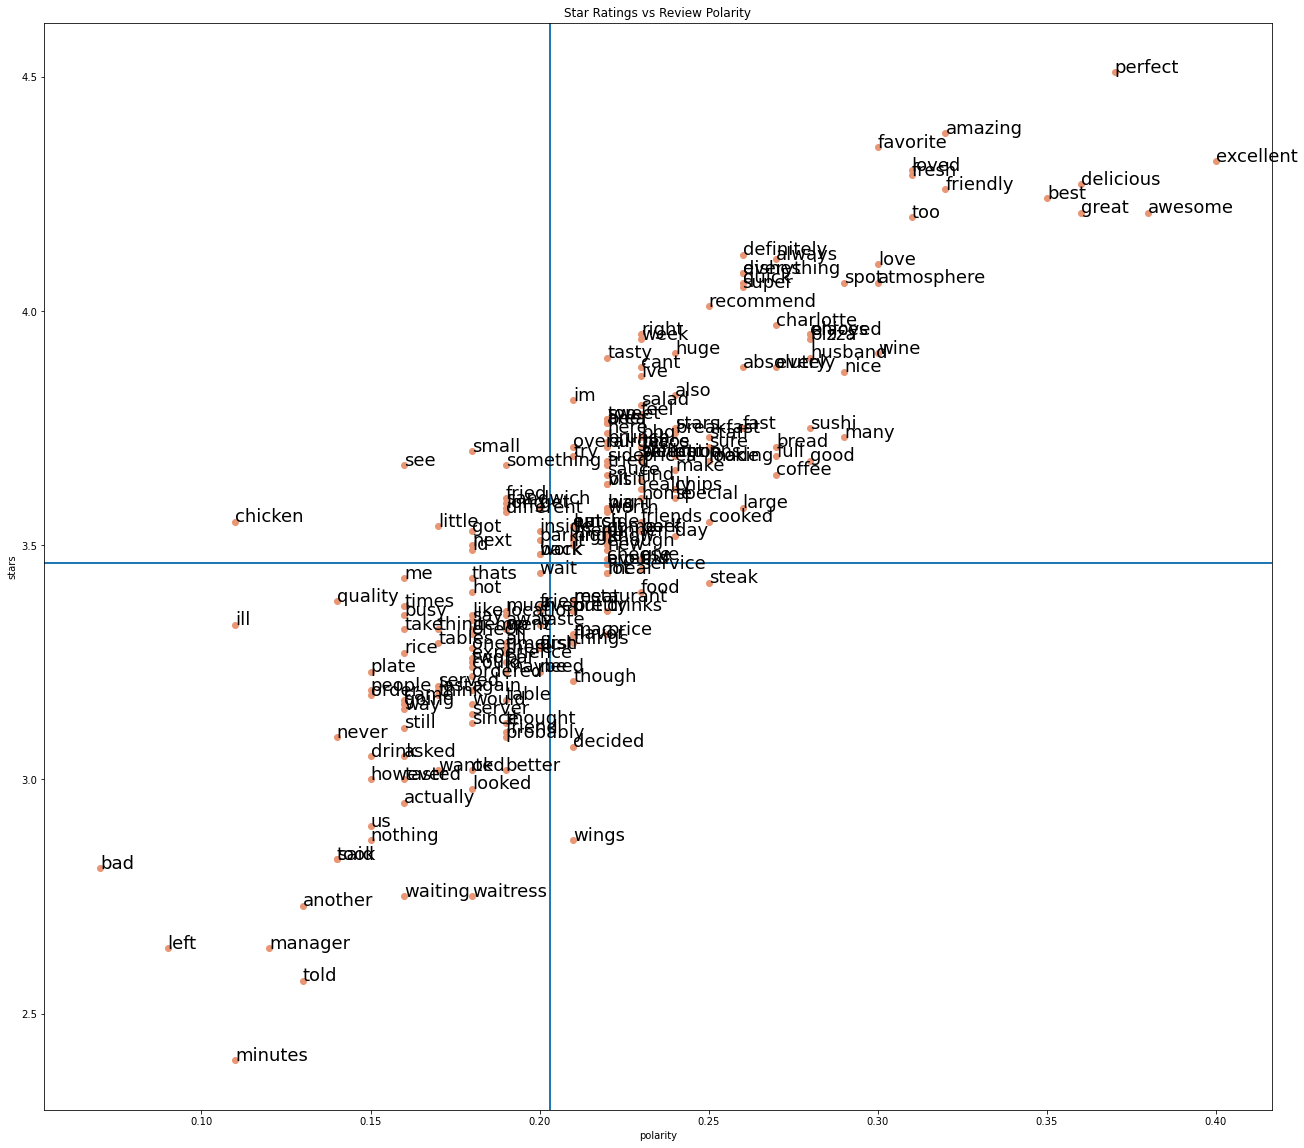

In [39]:


fig, ax= plt.subplots(figsize=(22,20))

for label, row in atleast50.iterrows():
    print(row)
    word  = row["word"]
    stars = row["stars"]
    polarity = row["polarity"]
 
    ax.scatter(polarity,
              stars,
              color='#e99675')
    ax.text(polarity, stars, s=word, fontsize=18)
    plt.xlabel("polarity")
    plt.ylabel("stars")
    plt.title("Star Ratings vs Review Polarity")
    plt.axvline(x=reviewstats["polarity"].mean())
    plt.axhline(y=reviewstats["stars"].mean())
plt.show()



## 2. Correlating restaurant data and household income

In this part, we'll use the census API to download household income data and overlay restaurant locations.

### 2.1 Query the Census API

Use the `cenpy` package to download **median household income in the past 12 months** by census tract from the 2018 ACS 5-year data set for your county of interest.

You have two options to find the correct variable names:
- Search through: https://api.census.gov/data/2018/acs/acs5/variables.html
- Initialize an API connection and use the `.varslike()` function to search for the proper keywords 

At the end of this step, you should have a pandas DataFrame holding the income data for all census tracts within the county being analyzed.

**Hints**

The FIPS codes for the various state/counties are: 

- Pittsburgh
    - PA code: '42'
    - County code: '003' (Allegheny County)
- Cleveland
    - OH code: '39'
    - County code: '035' (Cuyahoga County)
- Charlotte
    - NC code: '37'
    - County code: '119' (Mecklenburg County)

In [43]:
import cenpy

In [45]:
import pandas as pd
#I've been having issues importing pandas and geopandas 
#if import gpd is in the same cell as import pd, an error will be thrown
# and now if import pd is in the same cell as something else an error will be thrown

In [46]:
import geopandas as gpd

In [47]:

acs = cenpy.remote.APIConnection("ACSDT5Y2018")


In [48]:


acs.varslike("MEDIAN HOUSEHOLD INCOME", by='concept').sort_index()

,label,concept,predicateType,group,limit,predicateOnly,attributes,required
B19013A_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013A,0,NaN,"B19013A_001EA,B19013A_001M,B19013A_001MA",NaN
B19013B_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013B,0,NaN,"B19013B_001EA,B19013B_001M,B19013B_001MA",NaN
B19013C_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013C,0,NaN,"B19013C_001EA,B19013C_001M,B19013C_001MA",NaN
B19013D_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013D,0,NaN,"B19013D_001EA,B19013D_001M,B19013D_001MA",NaN
B19013E_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013E,0,NaN,"B19013E_001EA,B19013E_001M,B19013E_001MA",NaN
B19013F_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013F,0,NaN,"B19013F_001EA,B19013F_001M,B19013F_001MA",NaN
B19013G_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013G,0,NaN,"B19013G_001EA,B19013G_001M,B19013G_001MA",NaN
B19013H_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013H,0,NaN,"B19013H_001EA,B19013H_001M,B19013H_001MA",NaN
B19013I_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013I,0,NaN,"B19013I_001EA,B19013I_001M,B19013I_001MA",NaN
B19013_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013,0,NaN,"B19013_001EA,B19013_001M,B19013_001MA",NaN


In [49]:
variable = ["B19013A_001E"]

charlotte_county_code = "119"
NC_state_code = "37"

In [50]:
charlotte = acs.query(
    cols= variable,
    geo_unit="tract:*",
    geo_filter={"state": NC_state_code, 
                "county": charlotte_county_code},
)
charlotte.head()

,B19013A_001E,state,county,tract
0,76996,37,119,002400
1,222361,37,119,002800
2,123906,37,119,006103
3,61353,37,119,006104
4,68750,37,119,006105


### 2.2 Download census tracts from the Census and merge the data from Part 2.1

- Use the `cenpy` to set the correct map service and download census tracts for the desired geography
- Merge the downloaded census tracts with the household income DataFrame, making sure to specify the proper columns to perform the merge on.

In [51]:
#setting mapservice and taking a peek at the diff layers
acs.set_mapservice("tigerWMS_ACS2018")
#acs.mapservice.layers

Connection to American Community Survey: 5-Year Estimates: Detailed Tables 5-Year(ID: https://api.census.gov/data/id/ACSDT5Y2018)
With MapServer: Census ACS 2018 WMS

In [52]:
#I want tracts 
acs.mapservice.layers[8]

(ESRILayer) Census Tracts

In [53]:
#getting only charlotte tracts
where_clause = f"STATE = {NC_state_code} AND COUNTY = {charlotte_county_code}"
charlotte_tracts = acs.mapservice.layers[8].query(where=where_clause)

C:\Users\brine\miniconda3\envs\musa-550-fall-2021\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [55]:
#merging census data with geom data
charlotte_final =charlotte_tracts.merge(
    charlotte,
    left_on=["STATE", "COUNTY", "TRACT"],
    right_on=["state", "county", "tract"],
)

In [56]:
charlotte_final = charlotte_final.rename(columns = {"B19013A_001E":"MedHHInc"})

In [58]:
charlotte_final.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### 2.4 Load the restaurants data

Use the `latitude` and `longitude` columns to create a GeoDataFrame after loading the JSON data.

**Notes**

The JSON data is in a "records" format. To load it, you'll need to pass the following keywords: 

- `orient='records'`
- `lines=True`

In [59]:
#bringing data in
rests= pd.read_json(r'C:\Users\brine\Documents\GitHub\MUSA_550\assignment-4-bri-ne\data\restaurants_charlotte.json.gz', orient='records',lines=True )

In [60]:
#getting geom
rests['Coordinates'] = gpd.points_from_xy(rests['longitude'], rests['latitude'])

In [61]:
#setting crs
restsgeo = gpd.GeoDataFrame(rests, 
                            geometry="Coordinates", 
                            crs="EPSG:4326")

In [62]:
restsgeo.head(n=2)

,business_id,latitude,longitude,name,review_count,stars,Coordinates
0,gnKjwL_1w79qoiV3IC_xQQ,35.092564,-80.859132,Musashi Japanese Restaurant,170,4.0,POINT (-80.85913 35.09256)
1,BvYU3jvGd0TJ7IyZdfiN2Q,35.156338,-80.831878,Manzetti's Tavern,16,3.5,POINT (-80.83188 35.15634)


### 2.3 Plot a choropleth map of the household income

Use the built-in `geopandas` `plot()` function. 

Be sure to convert to a reasonable CRS first!

In [63]:
#reasonable!
charlotte_final=charlotte_final.to_crs('EPSG:2264')

In [64]:
charlotte_final.crs

<Projected CRS: EPSG:2264>
Name: NAD83 / North Carolina (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - North Carolina - counties of Alamance; Alexander; Alleghany; Anson; Ashe; Avery; Beaufort; Bertie; Bladen; Brunswick; Buncombe; Burke; Cabarrus; Caldwell; Camden; Carteret; Caswell; Catawba; Chatham; Cherokee; Chowan; Clay; Cleveland; Columbus; Craven; Cumberland; Currituck; Dare; Davidson; Davie; Duplin; Durham; Edgecombe; Forsyth; Franklin; Gaston; Gates; Graham; Granville; Greene; Guilford; Halifax; Harnett; Haywood; Henderson; Hertford; Hoke; Hyde; Iredell; Jackson; Johnston; Jones; Lee; Lenoir; Lincoln; Macon; Madison; Martin; McDowell; Mecklenburg; Mitchell; Montgomery; Moore; Nash; New Hanover; Northampton; Onslow; Orange; Pamlico; Pasquotank; Pender; Perquimans; Person; Pitt; Polk; Randolph; Richmond; Robeson; Rockingham; Rowan; Rutherford; Sampson; Scotland; Stanly; Stokes; Sur

In [65]:
#MedHHInc is an object not a number
charlotte_final.dtypes

MTFCC                object
OID                  object
GEOID                object
STATE                object
COUNTY               object
TRACT                object
BASENAME             object
NAME                 object
LSADC                object
FUNCSTAT             object
AREALAND              int64
AREAWATER             int64
CENTLAT              object
CENTLON              object
INTPTLAT             object
INTPTLON             object
OBJECTID              int64
STGEOMETRY.AREA     float64
STGEOMETRY.LEN      float64
geometry           geometry
MedHHInc             object
state                object
county               object
tract                object
dtype: object

In [66]:
#Making MedHHInc into a number
charlotte_final["MedHHInc"]=charlotte_final["MedHHInc"].astype(int)

In [68]:
#there are also negative values in the MedHHinc col
sorted_char = charlotte_final.sort_values(by="MedHHInc", ascending=True)
sorted_char.head(n=3)

,MTFCC,OID,GEOID,STATE,COUNTY,TRACT,BASENAME,NAME,LSADC,FUNCSTAT,...,INTPTLAT,INTPTLON,OBJECTID,STGEOMETRY.AREA,STGEOMETRY.LEN,geometry,MedHHInc,state,county,tract
230,G5020,207583717416506,37119980200,37,119,980200,9802,Census Tract 9802,CT,S,...,+35.1141093,-080.9312035,73875,1.676185e+07,21255.024471,"POLYGON ((1414483.070 494691.204, 1414542.418 ...",-666666666,37,119,980200
106,G5020,20758422808413,37119004800,37,119,004800,48,Census Tract 48,CT,S,...,+35.2574751,-080.8492145,13906,4.902549e+06,9932.405875,"POLYGON ((1445768.645 550861.386, 1445776.539 ...",-666666666,37,119,004800
48,G5020,20758422808391,37119980300,37,119,980300,9803,Census Tract 9803,CT,S,...,+35.2169288,-080.8379686,1890,7.252377e+05,3541.589122,"POLYGON ((1449422.342 539784.560, 1449902.222 ...",-666666666,37,119,980300


In [69]:
#Getting rid of them
charlotte_final = charlotte_final.loc[charlotte_final["MedHHInc"]>0]
sorted_char = charlotte_final.sort_values(by="MedHHInc", ascending=True)
sorted_char.head(n=3)

,MTFCC,OID,GEOID,STATE,COUNTY,TRACT,BASENAME,NAME,LSADC,FUNCSTAT,...,INTPTLAT,INTPTLON,OBJECTID,STGEOMETRY.AREA,STGEOMETRY.LEN,geometry,MedHHInc,state,county,tract
132,G5020,207583717416395,37119005609,37,119,005609,56.09,Census Tract 56.09,CT,S,...,+35.3223377,-080.7200438,53454,4.886382e+06,10234.456679,"POLYGON ((1482790.412 576428.207, 1482903.335 ...",16818,37,119,005609
160,G5020,207583717416362,37119005305,37,119,005305,53.05,Census Tract 53.05,CT,S,...,+35.2722436,-080.7849359,54220,3.407783e+06,8621.656612,"POLYGON ((1464274.185 556845.578, 1464283.633 ...",21000,37,119,005305
226,G5020,207583717417056,37119005604,37,119,005604,56.04,Census Tract 56.04,CT,S,...,+35.3040262,-080.7390968,64404,8.605202e+06,14232.076213,"POLYGON ((1475140.046 564533.561, 1475282.673 ...",27552,37,119,005604


In [70]:
import contextily as cx

[Text(0.5, 1.0, 'Median Household Income in Mecklenburg County, NC')]

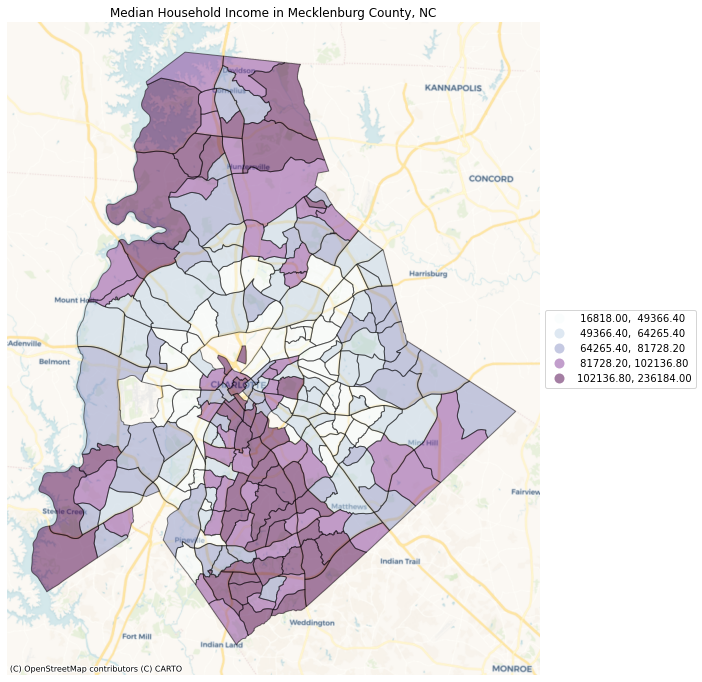

In [71]:

ax = charlotte_final.plot( 
                     column="MedHHInc",
                     figsize=(12, 12),
                     legend=True,
                     alpha=0.5,
                     edgecolor='k',
                     cmap='BuPu',
                     scheme='QUANTILES',
                     legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager, crs=charlotte_final.crs)
ax.set_axis_off()
ax.set(title="Median Household Income in Mecklenburg County, NC")

### 2.5 Overlay restaurants on the income map

Overlay the restaurants and color the points according to the 'stars' column. 

You can use the 'coolwarm' color map: blue points will have below-average reviews and red points will have above-average stars. 

**Hint**

You can use the `.geometry.total_bounds` attribute to get the axes limits of the county's census tracts. 

```python
[xmin, ymin, xmax, ymax] = income.geometry.total_bounds
```

You can then use these limits to set the matplotlib plot limits accordingly.

In [72]:
restsgeo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [73]:
#converting to same CRS
restsgeo=restsgeo.to_crs(charlotte_final.crs)


In [74]:
#spatial join with geopandas
char_rests = gpd.sjoin(restsgeo, charlotte_final, op='intersects', how='inner')

In [77]:
# still reasonable!
char_rests.crs

<Projected CRS: EPSG:2264>
Name: NAD83 / North Carolina (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - North Carolina - counties of Alamance; Alexander; Alleghany; Anson; Ashe; Avery; Beaufort; Bertie; Bladen; Brunswick; Buncombe; Burke; Cabarrus; Caldwell; Camden; Carteret; Caswell; Catawba; Chatham; Cherokee; Chowan; Clay; Cleveland; Columbus; Craven; Cumberland; Currituck; Dare; Davidson; Davie; Duplin; Durham; Edgecombe; Forsyth; Franklin; Gaston; Gates; Graham; Granville; Greene; Guilford; Halifax; Harnett; Haywood; Henderson; Hertford; Hoke; Hyde; Iredell; Jackson; Johnston; Jones; Lee; Lenoir; Lincoln; Macon; Madison; Martin; McDowell; Mecklenburg; Mitchell; Montgomery; Moore; Nash; New Hanover; Northampton; Onslow; Orange; Pamlico; Pasquotank; Pender; Perquimans; Person; Pitt; Polk; Randolph; Richmond; Robeson; Rockingham; Rowan; Rutherford; Sampson; Scotland; Stanly; Stokes; Sur

In [78]:
# still reasonable!
charlotte_final.crs

<Projected CRS: EPSG:2264>
Name: NAD83 / North Carolina (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - North Carolina - counties of Alamance; Alexander; Alleghany; Anson; Ashe; Avery; Beaufort; Bertie; Bladen; Brunswick; Buncombe; Burke; Cabarrus; Caldwell; Camden; Carteret; Caswell; Catawba; Chatham; Cherokee; Chowan; Clay; Cleveland; Columbus; Craven; Cumberland; Currituck; Dare; Davidson; Davie; Duplin; Durham; Edgecombe; Forsyth; Franklin; Gaston; Gates; Graham; Granville; Greene; Guilford; Halifax; Harnett; Haywood; Henderson; Hertford; Hoke; Hyde; Iredell; Jackson; Johnston; Jones; Lee; Lenoir; Lincoln; Macon; Madison; Martin; McDowell; Mecklenburg; Mitchell; Montgomery; Moore; Nash; New Hanover; Northampton; Onslow; Orange; Pamlico; Pasquotank; Pender; Perquimans; Person; Pitt; Polk; Randolph; Richmond; Robeson; Rockingham; Rowan; Rutherford; Sampson; Scotland; Stanly; Stokes; Sur

[Text(0.5, 1.0, 'Median Household Income and Restaurant Ratings\nin Mecklenburg County, NC')]

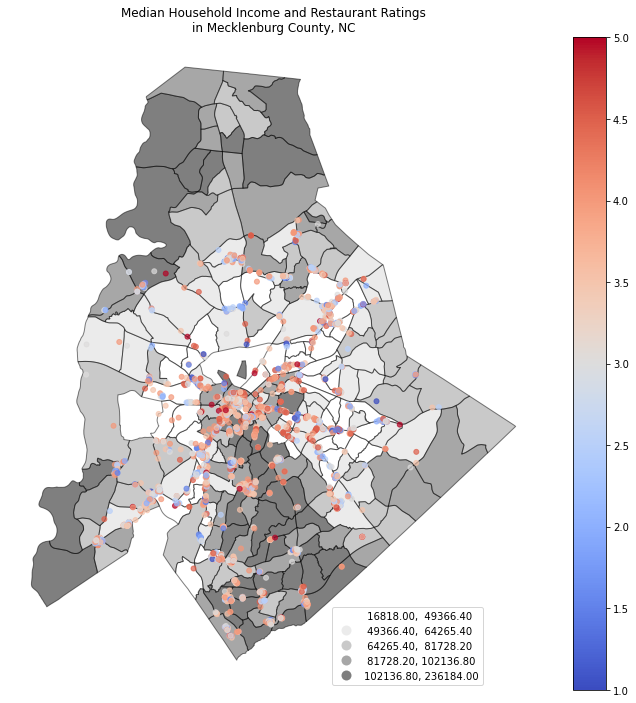

In [83]:


ax0 =  charlotte_final.plot( 
                     column="MedHHInc",
                     figsize=(12, 12),
                     legend=True,
                     alpha=0.5,
                     edgecolor='k',
                     cmap='Greys',
                     scheme='QUANTILES',
                     #label="MedHHInc",
                     legend_kwds={'loc': 'lower left', 
                                  'bbox_to_anchor':(0.6,0)})



ax2= char_rests.plot(ax=ax0, 
                column= "stars", 
                marker='o',  
                cmap='coolwarm', 
                markersize=25,
                alpha = 0.7,
               # label="Star Rating",
               legend=True)
   
#fig.colorbar(im, orientation="horizontal", pad=0.2)
#cx.add_basemap(ax0, source=cx.providers.CartoDB.Voyager, crs=charlotte_final.crs)
ax0.set_axis_off()
ax0.set(title="Median Household Income and Restaurant Ratings\nin Mecklenburg County, NC")





### 2.6 Comparing polarity vs. stars geographically

- Merge the restaurants GeoDataFrame with the DataFrame with the 'polarity' column for each review. 
- Make a side-by-side plot with two columns: one subplot shows hex bins giving the polarity of the restaurant review and the other shows hex bins giving the number of stars

As we saw in Section 1, you should see strong correlation between the two subplots. 

**Hints**
- The 'business_id' column should be present in both the data frames holding review data and restaurant data.
- See the `plt.subplots()` function for creating a figure with 2 subplots.


In [85]:
reviews.head()

,business_id,review_id,stars,text,formatted_text,polarity,subjectivity
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...,unique place great find waitress funny knowle...,0.404167,0.841667
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...,easily entering top 3 restaurants charlotte on...,0.508333,0.683333
2,ZCsvwa_dsqNB8d8tYHPdjw,ASZha3MiQJghtt3n5OGIsA,4,This random hole in the wall is located in the...,random hole wall located park rd shopping cent...,0.288910,0.546241
3,CGUK3cd2gxp2q3KPY19Oog,LrO2MkIWIjAoOeS5WImnrQ,5,Yum!! Had the kale grits and would definitely ...,yum kale grits would definitely again menu cho...,0.418750,0.750000
4,xHZmM-kGXqOfmQNTm0T05g,m14cjbICuRRASAitrh_YXA,3,Overall the food is really good. We had brusch...,overall food really good bruschetta seemed tad...,0.219556,0.549704


In [127]:
char_rests.sort_values(by="stars").head()

,business_id,latitude,longitude,name,review_count,stars,Coordinates,index_right,MTFCC,OID,...,CENTLON,INTPTLAT,INTPTLON,OBJECTID,STGEOMETRY.AREA,STGEOMETRY.LEN,MedHHInc,state,county,tract
581,GIIyJ3BjG2P4FNxBou2WPg,35.141819,-80.876992,Brooklyn Diner,5,1.0,POINT (1438913.381 511848.557),22,G5020,20758422821298,...,-080.8697026,+35.1456118,-080.8608595,577,3.353107e+06,7957.857827,83038,37,119,003106
1952,QXu5iUDVCg4fQ7SmiMSj6A,35.276979,-80.794002,McDonald's,9,1.0,POINT (1464607.689 560572.465),104,G5020,20758422821243,...,-080.8047200,+35.2574888,-080.8061142,14400,8.646238e+06,12658.946412,43000,37,119,005301
1052,BzXhD2JpiDNAzPGYocP4hw,35.210510,-80.690262,Quiznos,3,1.0,POINT (1495152.121 535841.473),151,G5020,207583717416405,...,-080.7050217,+35.2048538,-080.7088632,55014,5.508871e+06,10334.782955,48933,37,119,001916
926,7uOy_Tw_2w2Gf75d-Tyx9Q,35.202009,-80.744051,Just Because Massage Therapy,3,1.0,POINT (1479033.790 533025.972),154,G5020,207583717416401,...,-080.7553725,+35.1968425,-080.7567315,54969,3.013275e+06,8075.023302,49474,37,119,001918
2472,xKhjhko44Wr7IjMLnsV43g,35.022657,-80.847231,Blue Cave,8,1.0,POINT (1447001.750 468321.745),232,G5020,207583717417116,...,-080.8480632,+35.0238628,-080.8481842,73912,1.076426e+07,15112.516389,98607,37,119,005838


In [102]:
alldf = char_rests.merge(reviews, on="business_id", how='inner').drop(columns="stars_y").rename(columns={"stars_x":"stars"})

In [268]:
alldf=alldf.to_crs("EPSG:2264")
alldf2=alldf.to_crs("EPSG:4326")


In [266]:
alldf.crs
#allgdf = gpd.GeoDataFrame(alldf, crs="EPSG:2264", geometry="Coordinates")


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [232]:
import osmnx as ox

In [273]:
[xmin, ymin, xmax, ymax] = alldf.geometry.total_bounds

In [262]:


meck = ox.geocode_to_gdf('Mecklenburg County, NC, USA')
#meck = meck.to_crs(alldf.crs)
meck.crs



<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:title={'center':'Stars'}, xlabel=' ', ylabel=' '>

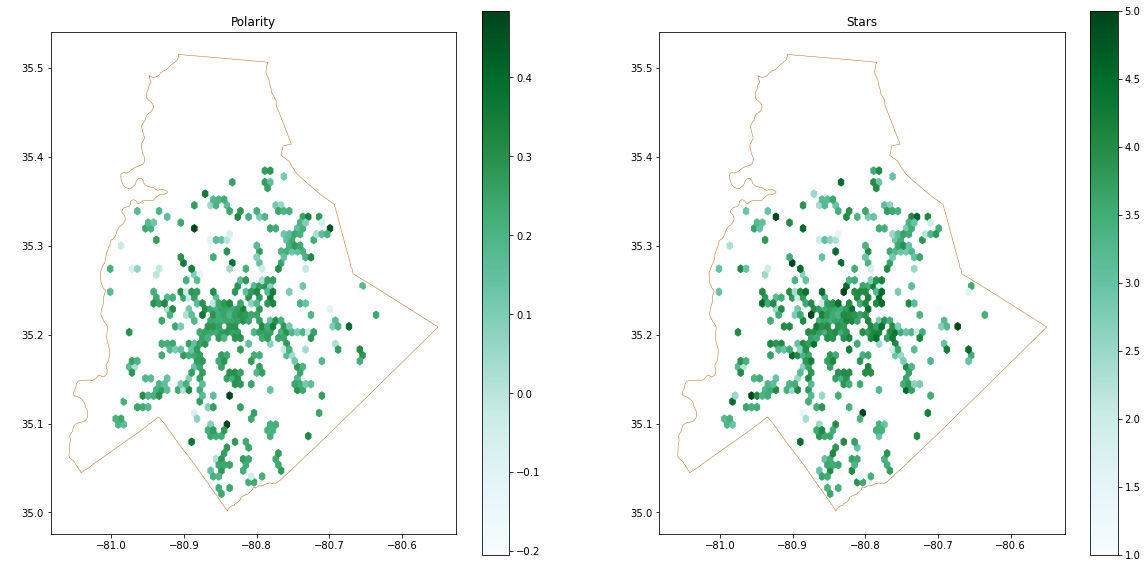

In [267]:
#nrows 1 and ncols 2 means plots are side by side
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20,10))

#ax0
alldf.plot.hexbin(x="longitude", y="latitude", 
                        C="polarity",
                        gridsize=50, ax=ax0)
ax0.set(title="Polarity", 
        xlabel=" ", 
        ylabel =" ")


meck.plot(ax=ax0, facecolor="none", edgecolor="#bf6922", linewidth=0.5)
#ax1
alldf.plot.hexbin(x="longitude", y="latitude", 
                       C="stars", 
                       gridsize=50, ax=ax1)
ax1.set(title="Stars", 
        xlabel=" ", 
        ylabel =" ")

meck.plot(ax=ax1, facecolor="none", edgecolor="#bf6922", linewidth=0.5)
#plt.xlim([xmin, xmax])
#plt.ylim([ymin, ymax])


In [269]:
meck = meck.to_crs(alldf.crs)

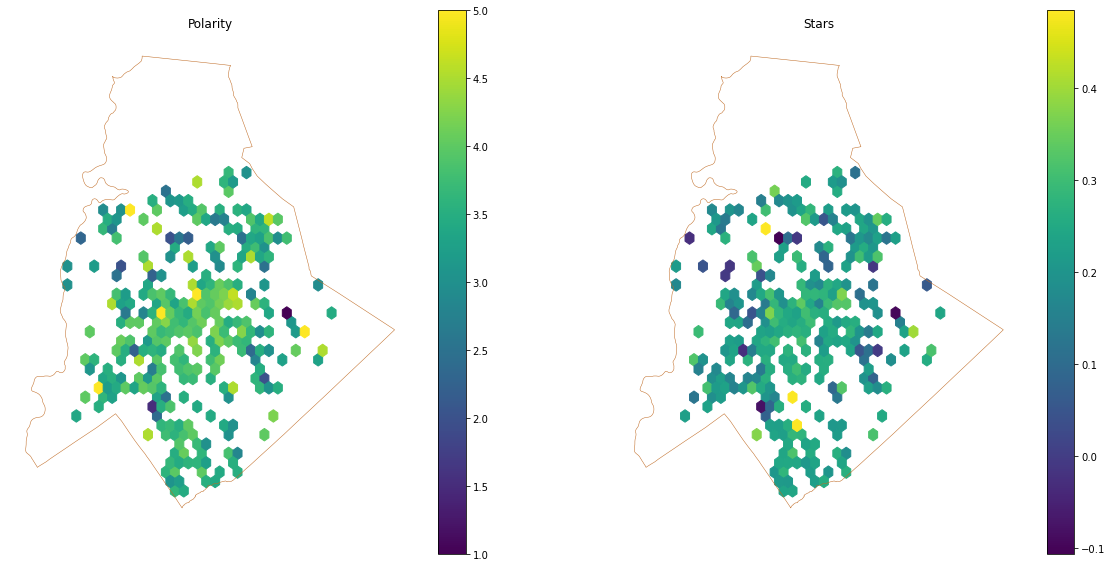

In [287]:
#nrows 1 and ncols 2 means plots are side by side
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20,10))

#ax0

xcoords = alldf.geometry.x
ycoords = alldf.geometry.y
hex_vals = ax0.hexbin(
    xcoords, 
    ycoords,
    C=alldf.stars,
    gridsize=30)

ax0.set(title="Polarity", 
        xlabel=" ", 
        ylabel =" ")


meck.plot(ax=ax0, facecolor="none", edgecolor="#bf6922", linewidth=0.5)
ax0.set_axis_off()
ax0.set_aspect("equal")

cbar = fig.colorbar(hex_vals, ax=ax0)


#ax1
xcoords = alldf.geometry.x
ycoords = alldf.geometry.y
hex_vals = ax1.hexbin(
    xcoords, 
    ycoords,
    C=alldf.polarity,
    gridsize=30)
ax1.set(title="Stars", 
        xlabel=" ", 
        ylabel =" ")

meck.plot(ax=ax1, facecolor="none", edgecolor="#bf6922", linewidth=0.5)
ax1.set_axis_off()
ax1.set_aspect("equal")
cbar = fig.colorbar(hex_vals, ax=ax1)


#plt.xlim([xmin, xmax])
#plt.ylim([ymin, ymax])


In [165]:
xcoords = allsubset.geometry.x
ycoords = allsubset.geometry.y

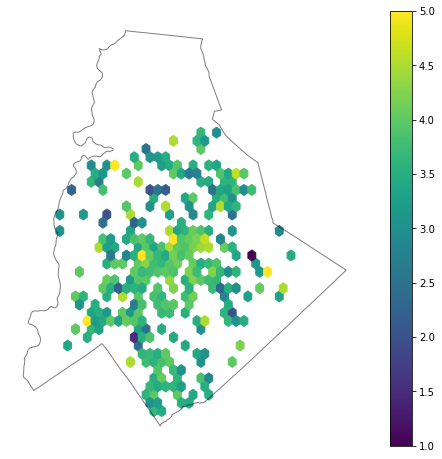

In [284]:
# Create the axes
fig, ax = plt.subplots(figsize=(10, 8))

# Use the .x and .y attributes
# NOTE: we are passing in the raw point values here! 
# Matplotlib is doing the binning and aggregation work for us!
xcoords = alldf.geometry.x
ycoords = alldf.geometry.y
hex_vals = ax.hexbin(
    xcoords, 
    ycoords,
    C=alldf.stars,
    #reduce_C_function=np.median,
    #bins="log",
    gridsize=30,
)

# Add the zillow geometry boundaries
meck.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1, alpha=0.5)

# Add a colorbar and format
cbar = fig.colorbar(hex_vals, ax=ax)
ax.set_axis_off()
ax.set_aspect("equal")

# Format cbar labels
#cbar.set_ticks([100, 1000])
#cbar.set_ticklabels(["$100k", "$1M"]);
#plt.xlim([xmin, xmax])
#plt.ylim([ymin, ymax])


In [281]:
ax.hexbin?


In [ ]:
.plot